# Análise de pneus classificados como "sucata" após inspeção em campo

Pneus retirados de circulação dos camihões pertencentes à frotas de transportes de carga ficam aguardando uma análise minuciosa por especialistas para determinar o destino mais adequado a cada uma dessas uniades pneumáticas. Durante verificações sistemáticas do estado dos pneus, em campo, o inspetor faz uma série de checagens e conforme sua impressão/aval poderá solicitar a retirada e substituição do mesmo por questões de segurança. Em 2017 foram recolhidos `890` pneus pela empresa de transporte _"XPTO Campinas 2017 Ltda"_. Os dados de cada uma destas unidades pneumáticas será alvo de nossa análise **KDD**.

**Objetivo da análise de dados** responder os questionamentos:
> 1. "Quanto tempo roda um pneu antes de ser sucateado?" Por `sulco`, por `tipo`, por `vida`, por `anomalia`
>
> 2. "Qual marca de pneu é mais sucateada?" Por `medida`, por `modelo`
>
> 3. "Existe correlção entre tempo de uso do pneu e" `modelo`, `sistema de reforma`, `tipo`, `vida`?
>
> 4. "Qual anomalia provoca mais sucateamento?"
>
> 5. "Como é o aproveitamento `sulco` dos pneus sucateados?"

In [1]:
#@title Carga das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dicionário de dados

- `No FOGO` numeração única destinada à identficação do pneu
- `MEDIDA` codificação que fornece as principais mediadas do pneu: Largura da seção nominal do pneu em mm. Diâmetro do aro em polegadas. Série (altura da seção = % da largura da seção). Por exemplo: _295/80R22.5_
- `FABRICANTE` mnemônico que identifica a indústria que produziu o pneu
- `MODELO` codificação que sintetiza o tipo de uso recomendado, índices de carga e de velocidade máximas permitido
- `DOT` (_Departament Of Transportation_) do pneu corresponde à sua data de fabricação. É composto por 4 números que informam a semana (para pneus mais novos) e ano de fabricação. Por exemplo _3713_ indica fabricado na 37ª semana do ano 2013
- `SULCO` altura da borracha usável em mm (um pneu novo possui 16.0 mm de sulco)
- `SIST.REF` Identificação do sistema de reforma aplicado ao pneu <1-recauchutagem, 2-recapagem e 3-remoldagem>. O serviço de reforma de pneus envolve os processos de recapagem (substituição da banda de rodagem - parte do pneu que entra em contato com o solo), recauchutagem (substituição da banda de rodagem e seus ombros - parte externa entre a banda de rodagem e seu flanco, parte lateral do pneu) e a remoldagem (substituição da rodagem, seus ombros e toda a superfície dos flancos). 
- `TIPO` determina o tipo de serviço aplicado ao pneu enquanto estava no uso <T-Tração ou L-Liso ou M-Misto>
- `VIDA` quantidade da reformas <NV-pneu novo, não teve reforma; 1,2,3, .... n-número de vezes reformado>
- `ANOMALIA` código do laudo aplicado pelo inspetor (existem 3 códigos em atributos diferentes, o principal é o primeiro laudo e o mais importante, aquele que fez com que o pneu fosse retirado de circulação, os demais são complementares.

### Código dos laudos

|Código|Descrição|
|:--:|:--|
|01|	Perfurações na banda de rodagem|
|02|	Arrancamento no ombro  (arraste)|
|03|	Avaria na banda de rodagem|
|04|	Avaria no flanco (lateral) - Retirar|
|05|	Avaria no flanco (lateral) - Observar|
|06|	Baixa pressão|
|07|	Barra de direção empenada|
|08|	Carcaça fadigada por dano|
|09|	Carcaça fadigada por tempo de uso|
|10|	Carcaça para exame ou venda|
|11|	Contaminação (química / óleo)|
|12|	Dano no talão - Flexionamento|
|13|	Dano no talão-Montagem/Desmontagem|
|14|	Dano no talão - Temperatura|
|15|	Desgaste irregular|
|16|	Excesso de oxidação|
|17|	Excesso de utilização|
|18|	Falha mecânica/operacional|
|19|	Falha na reforma|
|20|	Falha no conserto de borracharia|
|21|	Falha no conserto vulcanizado|
|22|	Falta de prisioneiro de roda|
|23|	Flange de roda empenada|
|24|	Flange de roda inadequada|
|25|	Flexionamento excessivo|
|26|	Infiltração no liner|
|27|	Núcleo defeituoso|
|28|	Peça do veículo roçando no pneu|
|29|	Roda trincada|
|30|	Rodas em duplo desalinhada|
|31|	Rodou vazio|
|32|	Ruptura por impacto|
|33|	Separação da banda de rodagem|
|34|	Separação das cintas da banda|
|35|	Separação do flanco (lateral)|
|36|	Separação entre lonas (diagonal)|
|37|	Separação no ombro (diagonal)|
|38|	Separação por perfuração|
|39|	Travamento de freios|
|40|	Trinca circunferêncial acima do talão|
|41|	Trincas radiais internas|
|42|	Válvula danificada|
|43|	Válvula sem extensão|
|44|	Válvula sem tampa|
|45|	Válvula fora de posição|
|46|	Válvula de Difícil acesso|
|47|	Roçamento lateral|
|48|	Falta porca de roda|
|49|	Duplo mal combinado|
|50|	Rodas diferentes|

### Carga dos dados

In [2]:
df = pd.read_csv('Sucata_2017.csv', sep=';', decimal=',')
df.head()

,No FOGO,MEDIDA,FABRICANTE,MODELO,DOT,SULCO,SIST.REF,TIPO,VIDA,ANOMALIA,ANOMALIA.1,ANOMALIA.2
0,1298,295/80R22.5,Mic,Xze 2+,11,"2,0",1,T,1,34,NaN,NaN
1,2334,295/80R22.5,Mic,Xze2+,11,"9,0",1,L,2,32,34,NaN
2,6187,275/80R22.5,Goo,G667,11,"16,0",1,L,1,14,NaN,NaN
3,6426,295/80R22.5,Pir,Fh75,07,"7,0",1,L,2,2,NaN,NaN
4,7614,295/80R22.5,Mic,Xze2+,08,"4,0",1,T,1,32,34,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No FOGO     890 non-null    object
 1   MEDIDA      890 non-null    object
 2   FABRICANTE  890 non-null    object
 3   MODELO      890 non-null    object
 4   DOT         890 non-null    object
 5   SULCO       889 non-null    object
 6   SIST.REF    789 non-null    object
 7   TIPO        890 non-null    object
 8   VIDA        890 non-null    object
 9   ANOMALIA    890 non-null    int64 
 10  ANOMALIA.1  321 non-null    object
 11  ANOMALIA.2  64 non-null     object
dtypes: int64(1), object(11)
memory usage: 83.6+ KB


### Verificação dos domínios dos atributos

In [4]:
# Distribuição das medidas
df['MEDIDA'].value_counts()

295/80R22.5    879
275/80R22.5     10
385/65R22.5      1
Name: MEDIDA, dtype: int64

In [5]:
# Distribuição dos fabricantes
df['FABRICANTE'].value_counts()

Pir    542
Mic    219
Bri     68
Goo     27
Con     17
O       12
Fir      4
Fat      1
Name: FABRICANTE, dtype: int64

In [6]:
# Distribuição dos modelos
df['MODELO'].value_counts()

Fg85      214
Fg01      117
Fr85      110
Xze2+      73
Fr01       39
         ... 
Sr200       1
Xde2+       1
F85         1
UR288       1
Xmz         1
Name: MODELO, Length: 62, dtype: int64

In [7]:
# Distribuição das datas de fabricação dos pneus
df['DOT'].value_counts()

13        399
14        163
12         64
11         63
15         62
16         37
10         25
09          8
08          6
07          4
?           4
27          2
1113        2
'0913       2
. 08        2
'0313       2
45          2
01          2
39          1
. 05        1
. 0316      1
. 0313      1
1414        1
1013        1
1713        1
. 09        1
4016        1
17          1
. 0913      1
41          1
34          1
24          1
42          1
47          1
44          1
. 0513      1
'0113       1
1913        1
3915        1
03          1
125         1
04          1
p9          1
1314        1
06          1
2312        1
'0816       1
1415        1
2313        1
3616        1
1313        1
'0814       1
1010        1
3913        1
4111        1
1213        1
2014        1
1613        1
31          1
Name: DOT, dtype: int64

In [8]:
# Distribuição das medidas de sulcos
df['SULCO'].value_counts()

10,0    101
7,0      87
9,0      82
8,0      81
5,0      65
6,0      63
11,0     57
4,0      56
3,0      50
1,0      42
12,0     40
2,0      34
R        32
13,0     12
16       10
14,0      7
9         7
13        6
16,0      5
11        5
15,0      5
7         4
1         4
14        4
2         3
12        3
6         3
3         3
18,0      3
4         3
8         3
5         2
15        2
17,0      2
19,0      1
32,0      1
10        1
Name: SULCO, dtype: int64

In [9]:
# Distribuição do sistema de reforma
df['SIST.REF'].value_counts()

1     713
2      52
8       6
9       5
6       3
10      3
12      3
4       2
Nv      1
3       1
Name: SIST.REF, dtype: int64

In [10]:
# Distribuição do tipo
df['TIPO'].value_counts()

L     588
T     196
M      86
 M      6
 T      6
T       3
M       2
N       1
1       1
 L      1
Name: TIPO, dtype: int64

In [11]:
# Distribuição da quantidade de reformas
df['VIDA'].value_counts()

1     504
2     214
NV    117
3      48
4       4
Nv      2
8       1
Name: VIDA, dtype: int64

In [12]:
df['ANOMALIA'].value_counts()

34    234
12    121
32    113
40     70
8      54
14     43
2      43
41     41
5      39
25     21
35     20
38     19
3      19
26     13
31     12
18      6
6       6
17      6
9       6
20      3
39      1
Name: ANOMALIA, dtype: int64

**Considerações iniciais:** Todos atributos são categóricos. Alguns atributos apresentam problemas e precisam de tratamento:

- **dados nulos** para os atributos `SULCO` e `SIST.REF`.  os atributos `ANOMALIA.1` e `ANOMALIA.2` são opcionais, para complementar o laudo do inspetor, por isso existem muitos dados nulos e não serão tratados.
- **inconsistências:**
    - valores do atributo `DOT` que serão usados para estimar o tempo de operação estão com **problemas de consistência**, alguns códigos apresentam a semana de fabricação, outros possuem dados que estão incoerentes com o sistema de codificação, por exemplo 125, p9, 34, 47, ...
     - `SULCO` não está no formato decimal e apresenta ocorrências de um valor 'R' que deve ser substituído por 0, valor para situação de raspado
     - Existem outras codificações para o atributo `SIST.REF` além do 1 e 2: requer análise do especialista de negócios para resolução do conflito
     - O atributo `TIPO` contém valores fora do domínio, além disso, estão com espaços no texto que precisam ser removidos
     - Ocorrências 'NV' e 'Nv' para a variável `VIDA` será substituída por ZERO, pois representa nenhuma reforma

## Pré processamento

### Tratamento da incompletude
O primeiro passo é verificar se a base necessita de algum procedimento de limpeza de dados. No caso da base `Sucata_2017.csv`, há valores ausentes para `SIST.REF` e `SULCO` afetando 100 objetos diferentes.

No Pandas temos os métodos{'backfill', 'bfill', 'pad', 'ffill', None}:
- ffill: propiciar última observação válida para o próximo preenchimento
- bfill: utiliza a próxima observação válida para preencher a lacuna

In [13]:
# Imputação do SIST.REF, utilizando a observação anterior para preenchimento
df['SIST.REF'].fillna(method='ffill', inplace=True)

In [14]:
# Imputação do SULCO, utilizando a observação posterior para preenchimento
df['SULCO'].fillna(method='bfill', inplace=True)

In [15]:
# Verificação dos dados imputados
df.loc[:, ['SIST.REF','SULCO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SIST.REF  890 non-null    object
 1   SULCO     890 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


### Tratamento de inconsistências
Na área de mineração de dados, um dado inconsistente normalmente é aquele cujo valor está fora do domínio do atributo ou apresenta uma grande discrepância em relação aos outros dados.

#### Função para tratamento do DOT

Utilizaremos os 2 últimos dígitos como entrada, além disso, será verificado se o valor é maior que 17, nestas condiçoes, ou de exceção (por exemplo na tentativa de converter um caractere não numérico em inteiro) o dado será considerado NaN

In [16]:
# Tratamendo dos DOTS
def whatDOT(DOT):
    temp = DOT[-2::]
    try:
        if (int(temp) > 17):
            temp = np.nan
    except:
        temp = np.nan
    finally:
        return temp

In [17]:
# Teste: obtendo os dois últimos caracteres do texto
"banana"[-2::]

'na'

In [18]:
# Teste: Relembrando estrutura try/except
try:
    if ('A'/0):
        print('A')
    else:
        print('B')
except:
    print('Erro')
else:
    print('sem erro')
finally:
    print('FIM')

Erro
FIM


In [19]:
# Teste: Função retornando valores DOT
df['DOT'].apply(whatDOT)

0      11
1      11
2      11
3      07
4      08
       ..
885    14
886    13
887    15
888    14
889    11
Name: DOT, Length: 890, dtype: object

#### DOT

- apresentou inconsistências, como exemplo, foram encontrados os seguintes valores:  ?, 27, 1113, '0913, . 08, '0313, 45. como estamos trabalhando com registros de 2017 anos maiores que 17 estão fora do domínio, além disso, temos prováveis erros de digitação.

In [20]:
# Transformando as inconsistências de datas en NaN
df['DOT'] = df['DOT'].apply(whatDOT)
df['DOT'].isna().sum()

18

In [21]:
# Preenchendo os valores NaN obtendo a última observação válida para o próximo enchimento
df['DOT'].fillna(method='ffill', inplace=True)
df['DOT'].isna().sum()

0

#### SULCO

- formatação do decimal, substituindo vírgula por ponto
- substituição de 'R' por zero (não há sulco quando o pneu está raspado)
- existem sulcos com valores acima de 23,5 mm => vamos tratar como erro de digitação e assim aplicar o valor médiano

Os pneus de caminhão têm uma profundidade de sulcos entre 10 e 20 mm quando são novos. Esse valor é dependente da função do pneu — para viagens de longa distância, fora de estrada, vias urbanas, e assim por diante.

Um pneu fora de estrada pode chegar a ter 23,5 mm de profundidade do sulco, para oferecer maior resistência e diminuir os danos à borracha. Enquanto isso, os pneus que percorrem distâncias maiores em eixos direcionais ou livres, têm, em média, 14 mm de profundidade. 

In [22]:
# O SULCO parace que foi importado de maneira incorreta - decimal não foi considerado
df['SULCO'] = df['SULCO'].str.replace(',0','')
# ALém disso, quando está sem sulco os inspetores registraram como "R"
df['SULCO'] = df['SULCO'].str.replace('R','0')

In [23]:
df['SULCO'].median()

7.0

In [24]:
filtro = df[(pd.to_numeric(df['SULCO'])>20)].index

In [25]:
df.iloc[filtro]

,No FOGO,MEDIDA,FABRICANTE,MODELO,DOT,SULCO,SIST.REF,TIPO,VIDA,ANOMALIA,ANOMALIA.1,ANOMALIA.2
294,16882,295/80R22.5,Pir,Fg85,13,32,1,L,1,12,NaN,NaN


In [26]:
# Aplicando o valor mediano ao item inconsistente
df.iloc[filtro, 5] = '7'

#### SIST.REF

- Existem valores fora do domínio [1, 3], dessa maneira os valores serão convertidos para um desses

In [27]:
# Criando um filtro tudo que não seja 1 e 2
filtro = df[~(df['SIST.REF'].isin(['1', '2']))].index

In [28]:
filtro

Int64Index([725, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858,
            859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869],
           dtype='int64')

In [29]:
# Vamos substituir o que não for 1 e 2 por 3
df.iloc[filtro, 6] = '3'

In [30]:
# Verificando o domínio do campo
df['SIST.REF'].value_counts()

1    809
2     57
3     24
Name: SIST.REF, dtype: int64

#### TIPO

- Remoção de espaços excedentes
- Arrumar dados fora de domínio => tratar como ausentes

In [31]:
# Remoção de espaços excedentes
df['TIPO'] = df['TIPO'].str.strip()

In [32]:
df['TIPO'].value_counts()

L    589
T    205
M     94
N      1
1      1
Name: TIPO, dtype: int64

In [33]:
filtro = df[df['TIPO'].isin(['N','1'])].index

In [34]:
# Transformando dados fora de domínio em ausentes
df.iloc[filtro, 7] = np.nan

In [35]:
# Tratando ausentes com método
df['TIPO'].fillna(method='bfill', inplace= True)

In [36]:
# Verificando inputação
df.iloc[filtro, 7]

461    T
529    T
Name: TIPO, dtype: object

#### VIDA

- Nv ou NV receberão o valor de 0 para representar nenhuma reforma

In [37]:
# Obtendo os índices dos valores inconsistentes
filtro = df[df['VIDA'].isin(['NV', 'Nv'])].index

In [38]:
# Substituindo valores NV e Nv por '0'
df.iloc[filtro, 8] = '0'

In [39]:
# Verificando dados
df.iloc[filtro]

,No FOGO,MEDIDA,FABRICANTE,MODELO,DOT,SULCO,SIST.REF,TIPO,VIDA,ANOMALIA,ANOMALIA.1,ANOMALIA.2
62,14996,295/80R22.5,Mic,Xde2+,13,3,1,T,0,8,NaN,NaN
73,15246,295/80R22.5,Pir,Fg85,13,4,1,M,0,12,NaN,NaN
75,15259,295/80R22.5,Pir,Fg85,13,7,1,M,0,12,NaN,NaN
82,15524,295/80R22.5,Mic,Xze 2+,13,7,1,L,0,18,NaN,NaN
129,16900,295/80R22.5,Pir,Fg85,13,7,1,M,0,34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
859,101247,295/80R22.5,Pir,Fh01,10,16,3,L,0,5,NaN,NaN
861,18296,295/80R22.5,Pir,Fg01,10,12,3,M,0,5,NaN,NaN
869,100357,295/80R22.5,Pir,Fg01,12,16,3,M,0,38,NaN,NaN
879,EBM49505,295/80R22.5,Pir,Fg01,16,9,1,L,0,34,NaN,NaN


### Transformação

Para padronizar e deixar os dados em um formato passível de aplicação das diferentes técnicas de mineração.

In [40]:
# Transformação para o tipo de dado adequado
df['SULCO'] = pd.to_numeric(df['SULCO'])

In [41]:
# Transformação para o tipo de dado adequado
df['DOT'] = pd.to_numeric(df['DOT'])

In [42]:
# Cálculo do tempo de rodagem em anos
df['ANOS'] = 17 - df['DOT']

## Análise Descritiva

### Dados Numéricos

In [43]:
# Criando uma função para plotar os gráficos
def to_displot(x, x_label, title):
    sns.set(rc={'figure.figsize':(15,8)})
    sns.set(font_scale=1.1)
    sns.displot(x=x, bins=10)
    plt.axvline(x.mean(), color='blue', lw=1.5)
    plt.axvline(x.median(), color='red', ls='--', lw=1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Frequência absoluta')
    plt.grid(True)
    plt.show()

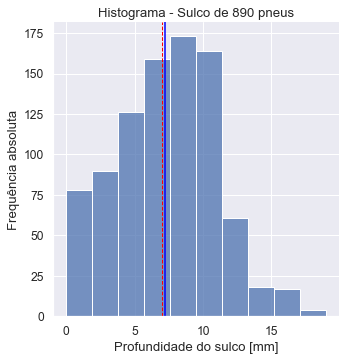

In [45]:
#Distribuição dos SULCOS
to_displot(df['SULCO'], 'Profundidade do sulco [mm]', f'Histograma - Sulco de {len(df)} pneus')

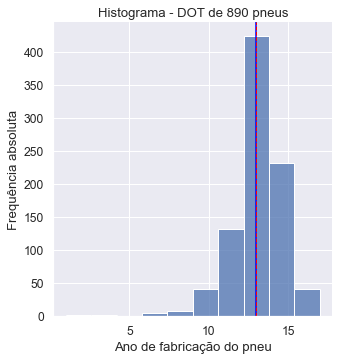

In [46]:
to_displot(df['DOT'], 'Ano de fabricação do pneu', f'Histograma - DOT de {len(df)} pneus')

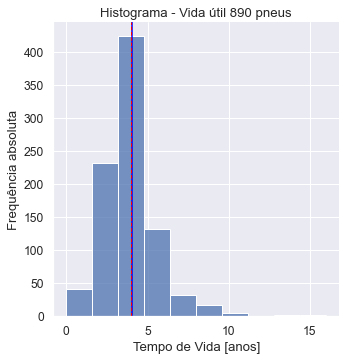

In [47]:
to_displot(df['ANOS'], 'Tempo de Vida [anos]', f'Histograma - Vida útil {len(df)} pneus')

### Dados Categóricos

#### 1-Quanto tempo roda um pneu antes de ser sucateado? Por sulco, por tipo, por vida, por anomalia

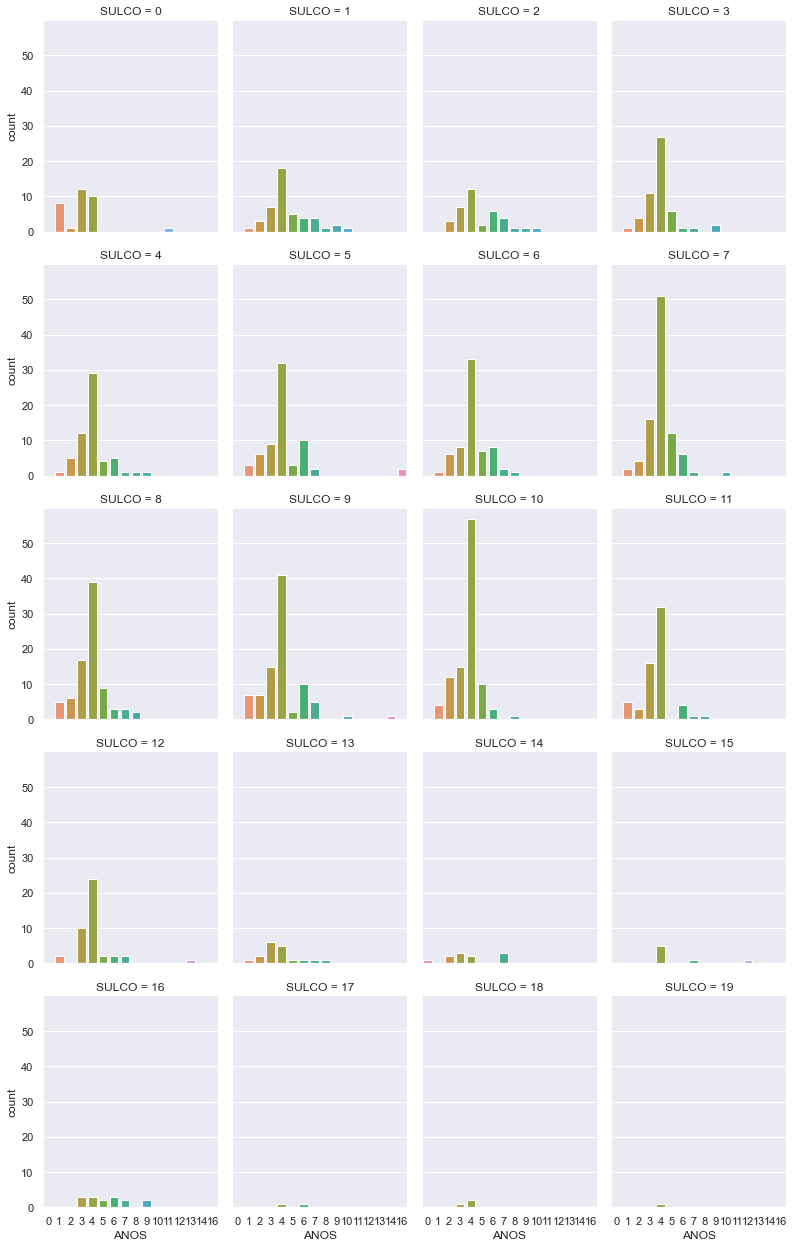

In [70]:
#plt.figure(figsize=(8,10), dpi=150)
sns.catplot(x='ANOS', data=df, col='SULCO', col_wrap=4, 
            height=3.5, kind="count", ci=None, aspect=.8)

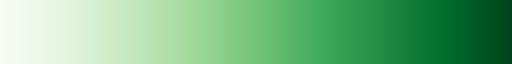

In [63]:
plt.get_cmap('Greens')

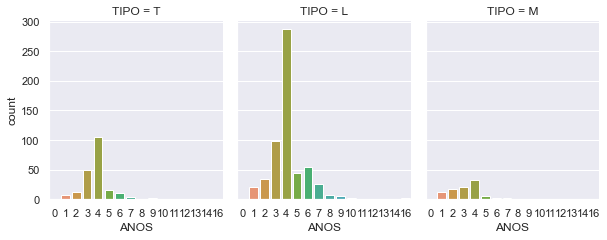

In [71]:
sns.catplot(x='ANOS', data=df, col='TIPO', col_wrap=4, 
            height=3.5, kind="count", ci=None, aspect=.8)

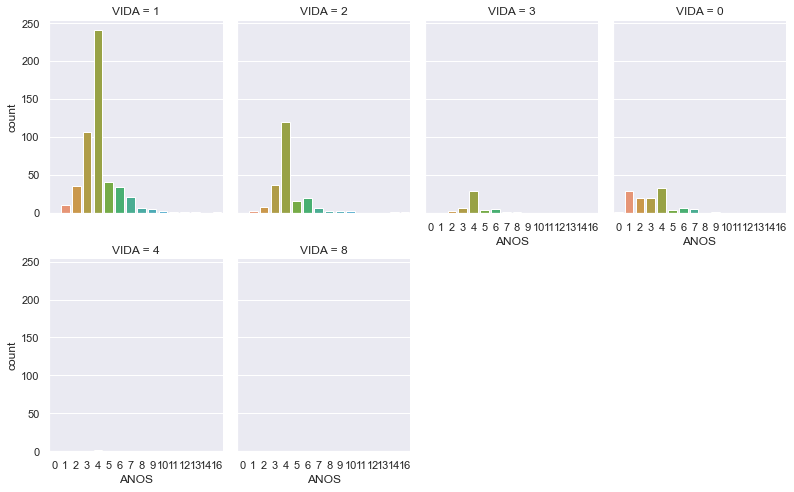

In [72]:
sns.catplot(x='ANOS', data=df, col='VIDA', col_wrap=4, 
            height=3.5, kind="count", ci=None, aspect=.8)

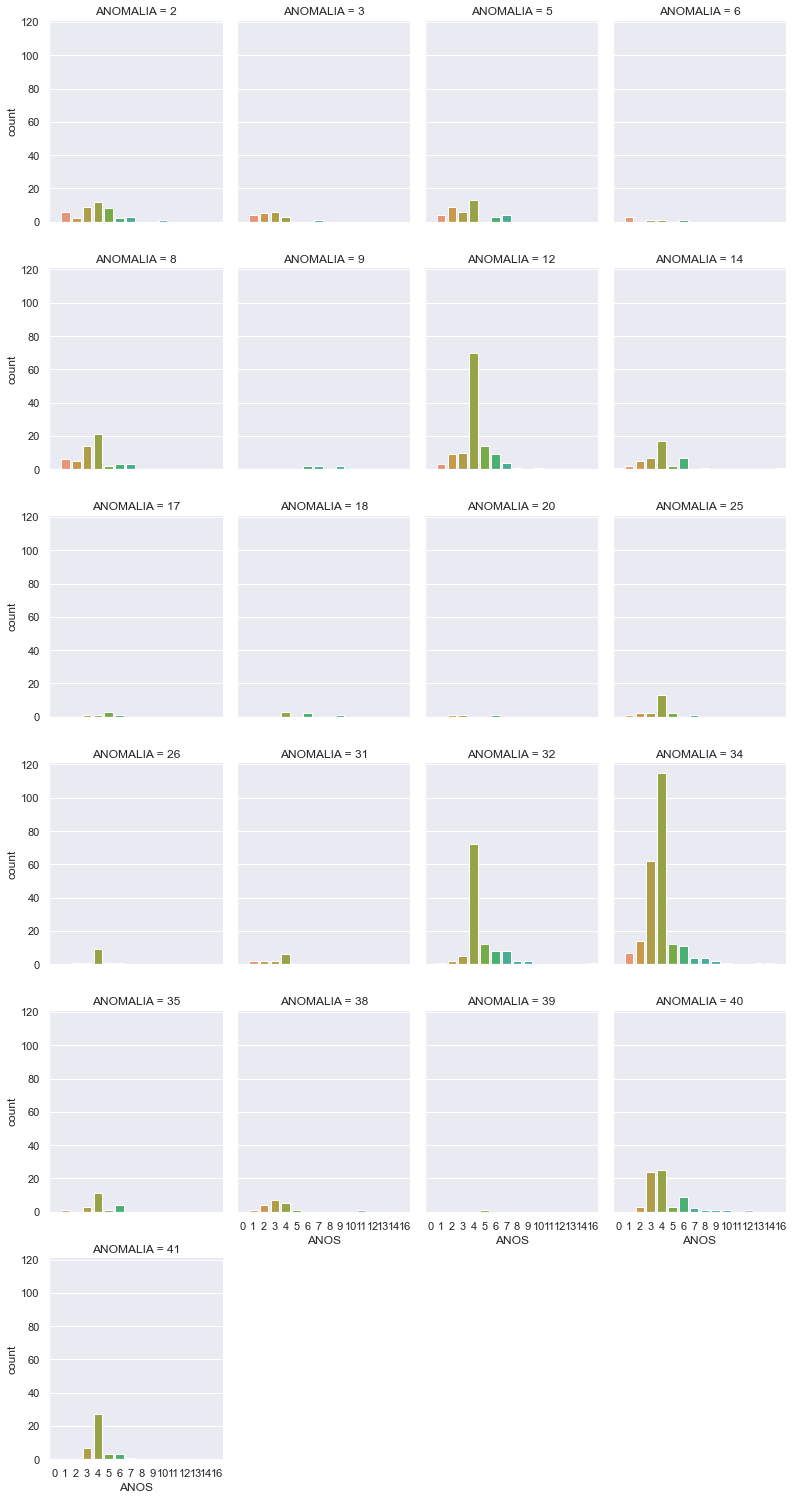

In [73]:
sns.catplot(x='ANOS', data=df, col='ANOMALIA', col_wrap=4, 
            height=3.5, kind="count", ci=None, aspect=.8)

#### 2-Qual marca de pneu é mais sucateada? Por medida, por modelo

In [76]:
sns.catplot(x='FABRICANTE', y='MEDIDA', data=df, 
            kind="bar", ci=None, aspect=.8)

TypeError: Neither the `x` nor `y` variable appears to be numeric.